In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from spreg import ML_Error
from libpysal import weights

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [10]:
db = gpd.read_file('../raw_data/for_models/regression_gdf.dbf', 'r')

AssertionError: 

In [30]:
clustering = gpd.read_file('../raw_data/for_models/cluster_gdf.dbf')

In [3]:
from sklearn.preprocessing import robust_scale
clustering.child_pov = robust_scale(clustering.child_pov) 

In [160]:
clustering.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'universiti', 'outdoor_fa', 'outdoor_le',
       'night_life', 'water', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'dyn_wel_po', 'welf_po',
       'social_hou', 'public_hou', 'dyn_ew', 'five_y_pls', 'rent_to_pr',
       'dyn_r_to_p', 'sales', 'dyn_sales', 'BZR_NAME', 'unemployme', 'welfare',
       'child_pov', 'dyn_unempl', 'dyn_welfar', 'dyn_child', 'noise', 'air',
       'green', 'bio', 'total_buil', 'B_1940', 'B_1941_199', 'B_1991_201',
       'B_age', 'vegpm20', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry'],
      dtype='object')

In [33]:
regression_df = gpd.read_file('../raw_data/for_models/regression_gdf.shp')

In [7]:
regression_df.columns

Index(['PLR_ID', 'public_tra', 'eating', 'culture', 'community', 'health_car',
       'public_ser', 'education', 'schools', 'universiti', 'kindergart',
       'outdoor_fa', 'outdoor_le', 'night_life', 'water', 'mig_rate',
       'HK_EU15', 'HK_EU28', 'HK_Polen', 'HK_EheJug', 'HK_EheSU', 'HK_Turk',
       'HK_Arab', 'HK_Sonst', 'HK_NZOrd', 'ave_rent', 'social_hou',
       'public_hou', 'dyn_ew', 'five_y_pls', 'dyn_sales', 'BZR_NAME',
       'child_pov', 'dyn_unempl', 'noise', 'air', 'green', 'bio', 'vegpm20',
       'vegpm10', 'change', 'ch_rate', 'other_sch', 'vocat_sch', 'primary_sc',
       'Gymnasium', 'secon_sch', 'priv_schoo', 'sp_nee_sch', 'kita',
       'stations', 'geometry'],
      dtype='object')

In [35]:
regression_df.child_pov.sort_values()

425     0.66
52      0.91
189     1.78
176     1.79
339     1.98
       ...  
37     67.37
354    67.53
307    68.33
79     71.88
456    74.68
Name: child_pov, Length: 536, dtype: float64

In [32]:
clustering.child_pov.sort_values()

425     0.66
52      0.91
189     1.78
176     1.79
339     1.98
       ...  
37     67.37
354    67.53
307    68.33
79     71.88
456    74.68
Name: child_pov, Length: 536, dtype: float64

In [5]:
y_name = 'child_pov'

In [41]:
y = np.array(clustering.child_pov)

In [17]:
x_names = [
    'mig_rate', 'ave_rent','night_life',
    'public_hou','secon_sch', 'kita', 'culture', 'vocat_sch', 'sales'
]

In [134]:
X = np.array(db[x_names])

In [10]:
ds_name = 'regression dataset'

In [8]:
inv_dist = weights.DistanceBand.from_dataframe(clustering, 3000, geom_col='geometry', binary=False)

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
 There are 3 islands with ids: 100, 127, 344.
  warnings.warn(message)


In [48]:
w = weights.Queen.from_dataframe(clustering)
w_name = 'Queen'
w.transform = 'r'

In [43]:
mlerr = ML_Error(y = y,
                 x =np.array(clustering[x_names]),
                 w = inv_dist,
                 name_y=y_name,
                 name_x=x_names,
                 name_w='Inv dist',
                 name_ds=ds_name)

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/scipy/optimize/_minimize.py:870: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


In [44]:
mse(y, mlerr.predy)

91.62057884205531

In [45]:
mae(y, mlerr.predy)

7.285177457323395

In [46]:
print(mlerr.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :regression dataset
Weights matrix      :    Inv dist
Dependent Variable  :   child_pov                Number of Observations:         536
Mean dependent var  :     24.5406                Number of Variables   :          10
S.D. dependent var  :     16.6701                Degrees of Freedom    :         526
Pseudo R-squared    :      0.6697
Sigma-square ML     :      91.207                Log likelihood        :   -1970.073
S.E of regression   :       9.550                Akaike info criterion :    3960.145
                                                 Schwarz criterion     :    4002.987

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------

In [104]:
regression_df['residuals'] = mlerr.u

In [86]:
regression_df['predicted'] = mlerr.predy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


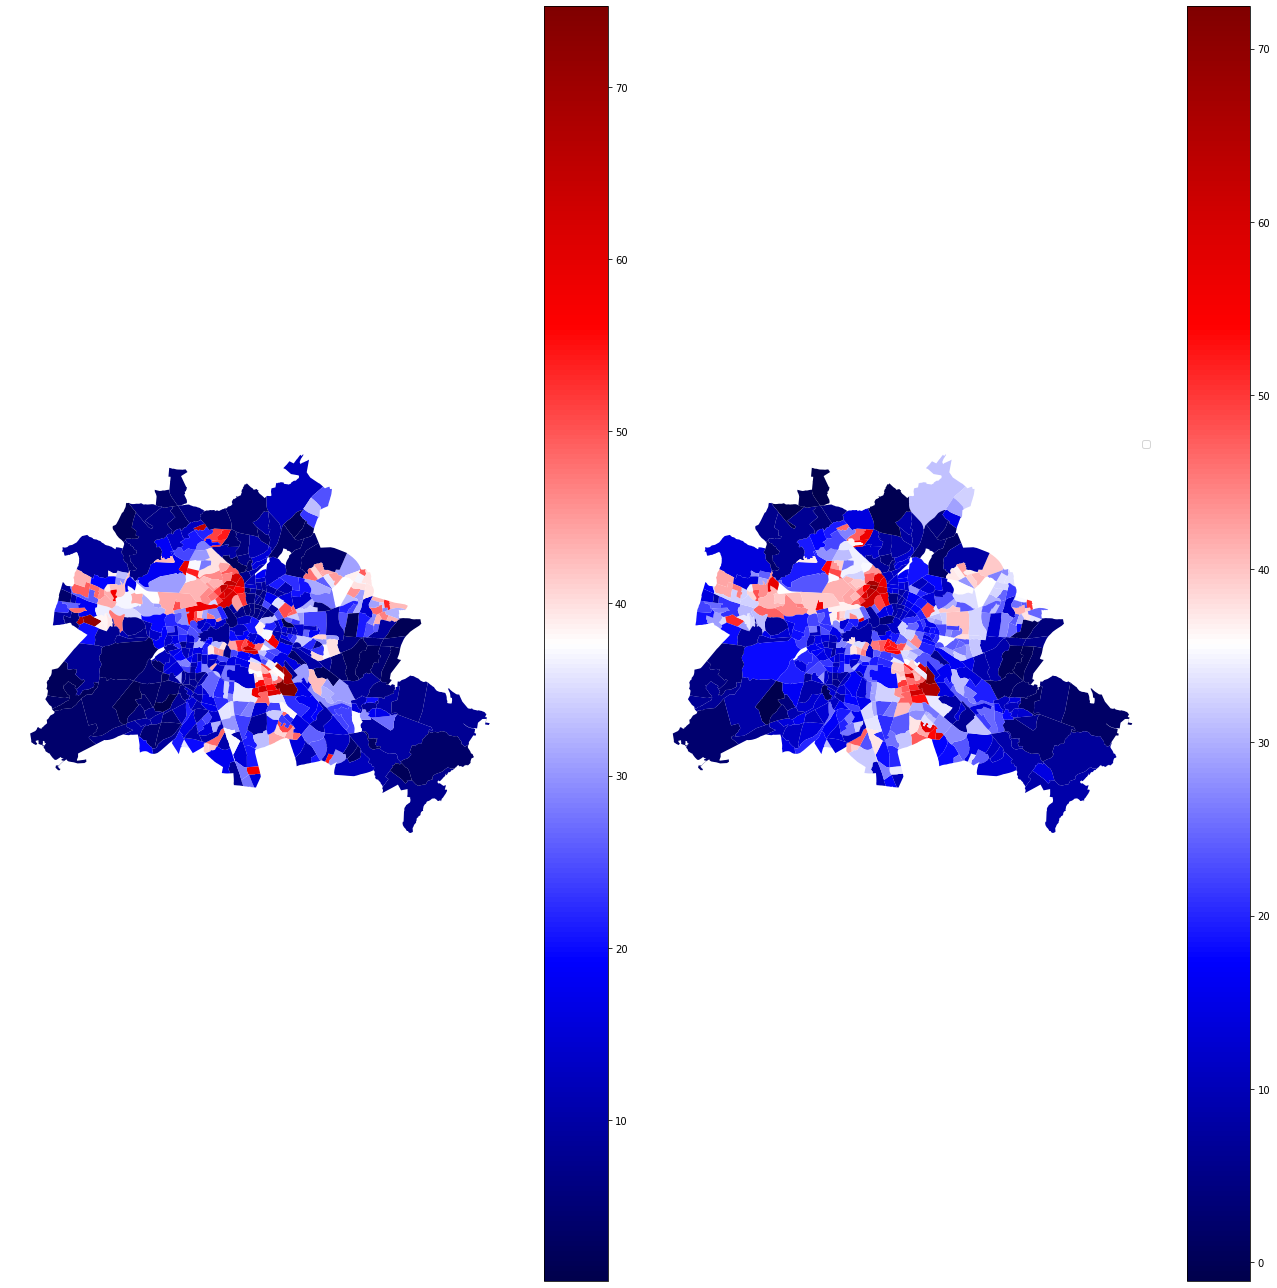

In [98]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
axs = axs.flatten()
axs[0] = regression_df.plot(column='child_pov', ax=axs[0], cmap='seismic', legend=True)
axs[1] = regression_df.plot(column='predicted', ax=axs[1], cmap='seismic', legend=True)
axs[0].set_axis_off()
axs[1].set_axis_off()
f.tight_layout()
plt.legend(fontsize=10)
plt.show()

In [171]:
regression_df['residuals'] = mlerr.u

<AxesSubplot:>

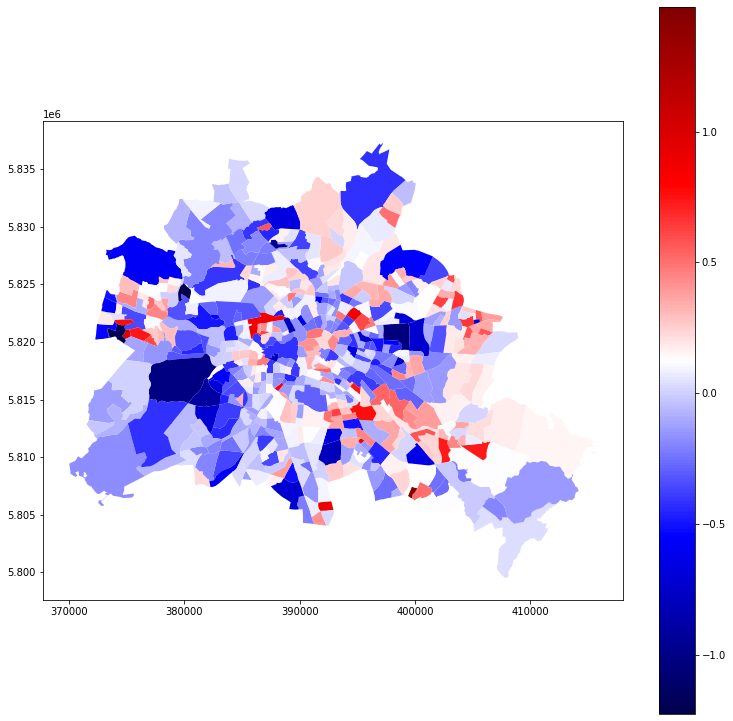

In [172]:
regression_df.plot(figsize=(13,13), column='residuals', cmap='seismic', legend=True)

In [120]:
np.std(regression_df.predicted)

14.741099101582039

<AxesSubplot:>

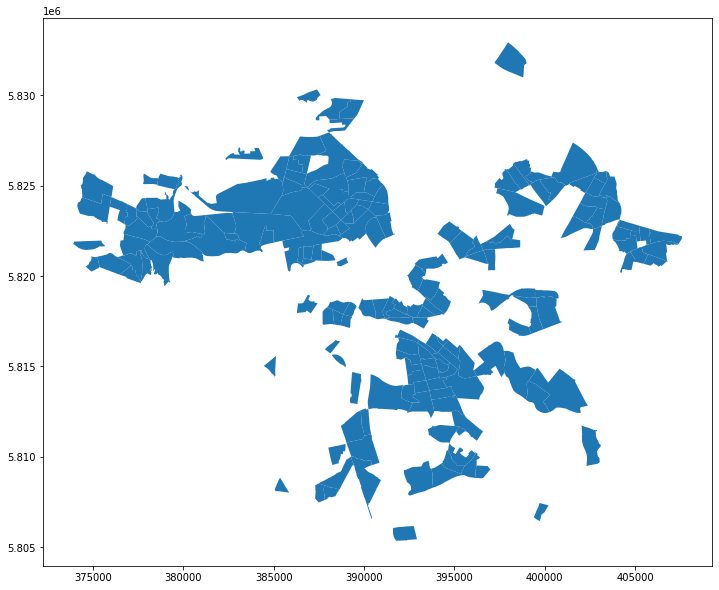

In [132]:
regression_df[regression_df.child_pov > 30].plot(figsize=(12,12))